# Save full status data to json file

In [24]:
# source https://github.com/ugis22/analysing_twitter
#install packages if needed
# import sys
# !{sys.executable} -m pip install networkx

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import json 
import datetime
import time
import seaborn as sns
import wordcloud

In [4]:
# Create a second dataframe to put important information
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

def add_user_info(tweets_final):
    tweets_final["screen_name"] = tweets_df["user"].apply(lambda x: x["screen_name"])
    tweets_final["user_id"] = tweets_df["user"].apply(lambda x: x["id"])
    tweets_final["followers_count"] = tweets_df["user"].apply(lambda x: x["followers_count"])
    return tweets_final

# add retweets
def add_retweets(tweets_final):
    # Inside the tag 'retweeted_status' will find 'user' and will add 'screen name' and 'id'    
    tweets_final["retweeted_screen_name"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else np.nan)
    tweets_final["retweeted_id"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else np.nan)
    return tweets_final

# add the user mentions 
def add_usermentions(tweets_final):
    # Inside the tag 'entities' will find 'user mentions' and will add 'screen name' and 'id'
    tweets_final["user_mentions_screen_name"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["screen_name"] if x["user_mentions"] else np.nan)
    tweets_final["user_mentions_id"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["id_str"] if x["user_mentions"] else np.nan)
    return tweets_final


# add the information about replies
def add_in_reply(tweets_final):
    # Just copy the 'in_reply' columns to the new dataframe
    tweets_final["in_reply_to_screen_name"] = tweets_df["in_reply_to_screen_name"]
    tweets_final["in_reply_to_status_id"] = tweets_df["in_reply_to_status_id"]
    tweets_final["in_reply_to_user_id"]= tweets_df["in_reply_to_user_id"]
    return tweets_final

def fill_df(tweets_final):
    add_user_info(tweets_final)
    add_usermentions(tweets_final)
    add_retweets(tweets_final)
    add_in_reply(tweets_final)
    return tweets_final


In [ ]:
# Creating the authentication object
auth = tweepy.OAuthHandler(auth_ap.consumer_key, auth_ap.consumer_secret)
# Setting your access token and secret
auth.set_access_token(auth_ap.access_token, auth_ap.access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [5]:
class TweetMiner(object):
    import auth_ap
    # number of tweets per one pull; there is limit on this
    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        auth_ap.consumer_key,
        'consumer_secret':     auth_ap.consumer_secret,
        'access_token_key':    auth_ap.access_token,
        'access_token_secret': auth_ap.access_token_secret
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 100):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit

    def mine_tweets_user(self, user="", last_tweet_id  =  False, max_pages=17):

        data_page = []
        # keep track of last tweet id
        # multiply by the # of result_limit = total tweets
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name = user,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                        )
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id

            page += 1
        # returns list of dict
        return data_page, last_tweet_id
    
    def mine_tweets_keyword(self, query = "", language = 'en', last_tweet_id  =  False,
                         max_pages=17):

        data_page           =  []
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.search(q = query, lang = language,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.search(q = query, lang = language,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                 )
    
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id
            page += 1
        # returns list of dict
        return data_page, last_tweet_id

In [ ]:
# params for search
max_pages = 70
result_limit = 100
query = '#vr'

# initial values
data_page = []
page = 1
# last_tweet_id = False

while page <= max_pages:
    if last_tweet_id:
        statuses   =   api.search(q = query, lang = language,
                                             count = result_limit,
                                             # get tweets older than last retrieved ones  
                                             max_id = last_tweet_id - 1,
                                             tweet_mode = 'extended',
                              
                                            )        
    else:
        statuses   =   api.search(q = query, lang = language,
                                                count = result_limit,
                                                tweet_mode = 'extended',
                                                )

    page += 1

## Mine tweets by query

In [6]:
miner = TweetMiner(result_limit = 100)
counter = 1
ls_master = []
q_word = '#vr'
# last_id = False
while counter < 15:
    print (counter)
    try:
        
        ls_tweets, last_tweet_id = miner.mine_tweets_keyword(query=q_word, language = 'en', 
                                       last_tweet_id = last_id, max_pages = 34)
        last_id = last_tweet_id
        ls_master.extend(ls_tweets)
    except:
        print ("Limit is reached")
#         time.sleep(16*60) #15 minute sleep time
        
    if len(ls_tweets) < 1:
        break
        
    counter+=1

1
2
3
4
5
6
Limit is reached
7
Limit is reached
8
Limit is reached
9
Limit is reached
10
Limit is reached
11
Limit is reached
12
Limit is reached
13
Limit is reached
14
Limit is reached


In [11]:
ls_master[-1]

{'created_at': 'Fri Sep 04 22:08:44 +0000 2020',
 'id': 1302005702240722944,
 'id_str': '1302005702240722944',
 'full_text': 'RT @SkyWatcherVR: #Goats and #Chickens are cool funny creatures,  hang out with them in 5.7k #VR180 #Video with #3D #Spatial #Ambisonic #Au…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'text': 'Goats', 'indices': [18, 24]},
   {'text': 'Chickens', 'indices': [29, 38]},
   {'text': 'VR180', 'indices': [93, 99]},
   {'text': 'Video', 'indices': [100, 106]},
   {'text': '3D', 'indices': [112, 115]},
   {'text': 'Spatial', 'indices': [116, 124]},
   {'text': 'Ambisonic', 'indices': [125, 135]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SkyWatcherVR',
    'name': 'SkyWatcherVR',
    'id': 1163573997520470018,
    'id_str': '1163573997520470018',
    'indices': [3, 16]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">

In [12]:
fname = 'vr_{}.json'.format(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S"))
with open(fname, 'w', encoding='utf8') as file:
    json.dump(ls_master, file)

In [13]:
# path = r"U:\Data_Analysis\pak6\DS project\test.json"
df = pd.read_json(fname)
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,None,2020-09-11 02:42:28,"[0, 140]","{'hashtags': [{'text': 'Hololens', 'indices': ...",NaN,0,False,RT @marcusborba: Hololens will make new imagin...,None,...,NaN,NaN,NaN,NaN,4,False,{'created_at': 'Fri Sep 11 01:00:24 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 802197583015841792, 'id_str': '80219758..."
1,NaN,None,2020-09-11 02:42:06,"[0, 140]","{'hashtags': [{'text': 'teaching', 'indices': ...",NaN,0,False,RT @pdculbert_UBC: (1/18) 📢Need videos for #te...,None,...,NaN,NaN,NaN,NaN,49,False,{'created_at': 'Thu Sep 10 22:24:02 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 200686621, 'id_str': '200686621', 'name..."
2,NaN,None,2020-09-11 02:42:03,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @eraser: A systematic review of immersive v...,None,...,NaN,NaN,NaN,NaN,1,False,{'created_at': 'Fri Sep 11 02:00:09 +0000 2020...,"<a href=""https://meta-evidence.co.uk"" rel=""nof...",False,"{'id': 985820315522650113, 'id_str': '98582031..."
3,NaN,None,2020-09-11 02:41:02,"[0, 86]","{'hashtags': [{'text': 'VR', 'indices': [83, 8...","{'media': [{'id': 1304248555721416711, 'id_str...",0,False,"Holopoint Oculus Quest Review: Brilliant, Dizz...",None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",False,"{'id': 757365218, 'id_str': '757365218', 'name..."
4,NaN,None,2020-09-11 02:38:09,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @virtuallyxander: Talking about some of the...,None,...,NaN,NaN,NaN,NaN,0,False,{'created_at': 'Thu Sep 10 22:12:45 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 2209420962, 'id_str': '2209420962', 'na..."


In [17]:
tweets_df = df

In [21]:
# Columns that are going to be the same
equal_columns = ["created_at", "id", "full_text"]
tweets_final[equal_columns] = tweets_df[equal_columns]# Get the basic information about user 
tweets_final = fill_df(tweets_final)
tweets_final = tweets_final.where((pd.notnull(tweets_final)), None)

In [23]:
tweets_final.head()

,created_at,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,retweeted_id,retweeted_screen_name,user_mentions_screen_name,user_mentions_id,text,user_id,screen_name,followers_count,full_text
0,2020-09-11 02:42:28,1304248919329775617,None,None,None,18068926,marcusborba,marcusborba,18068926,None,802197583015841792,Nishant33962550,670,RT @marcusborba: Hololens will make new imagin...
1,2020-09-11 02:42:06,1304248824089567232,None,None,None,94601569,pdculbert_UBC,pdculbert_UBC,94601569,None,200686621,Bsouthey,472,RT @pdculbert_UBC: (1/18) 📢Need videos for #te...
2,2020-09-11 02:42:03,1304248812450521088,None,None,None,3122211,eraser,eraser,3122211,None,985820315522650113,EvidenceRobot,4613,RT @eraser: A systematic review of immersive v...
3,2020-09-11 02:41:02,1304248557642412033,None,None,None,None,None,None,None,None,757365218,RickKing16,116151,"Holopoint Oculus Quest Review: Brilliant, Dizz..."
4,2020-09-11 02:38:09,1304247833545994241,None,None,None,4371952884,virtuallyxander,virtuallyxander,4371952884,None,2209420962,peoples_greg,109,RT @virtuallyxander: Talking about some of the...


# NetworkX interactions

In [36]:
import networkx as nx
from scipy.stats import mode
# Get the interactions between the different users
def get_interactions(row):
    # From every row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    user = row["user_id"], row["screen_name"]
    # Be careful if there is no user id
    if user[0] is None:
        return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    
    # Add all interactions 
    # First, we add the interactions corresponding to replies adding the id and screen_name
    interactions.add((row["in_reply_to_user_id"], row["in_reply_to_screen_name"]))
    # After that, we add the interactions with retweets
    interactions.add((row["retweeted_id"], row["retweeted_screen_name"]))
    # And later, the interactions with user mentions
    interactions.add((row["user_mentions_id"], row["user_mentions_screen_name"]))
    
    # Discard if user id is in interactions
    interactions.discard((row["user_id"], row["screen_name"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

In [27]:
graph = nx.Graph()

In [31]:
for index, tweet in tweets_final.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        int_id, int_name = interaction
        graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        

        graph.nodes[user_id]["name"] = user_name
        graph.nodes[int_id]["name"] = int_name



In [34]:
print("There are {} nodes and {} edges present in the Graph".format(graph.number_of_nodes(), graph.number_of_edges()))

There are 8509 nodes and 9487 edges present in the Graph


In [40]:
degrees = [val for (node, val) in graph.degree()]

print("The maximum degree of the Graph is {}".format(np.max(degrees)))   
print("The minimum degree of the Graph is {}".format(np.min(degrees)))

print("The average degree of the nodes in the Graph is {}".format(np.mean(degrees)))  
print("The most frequent degree of the nodes found in the Graph is {}".format(mode(degrees)[0][0]))

The maximum degree of the Graph is 210
The minimum degree of the Graph is 1
The average degree of the nodes in the Graph is 2.229874250793278
The most frequent degree of the nodes found in the Graph is 1


In [41]:
if nx.is_connected(graph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


In [42]:
print("There are {} connected components in the Graph".format(nx.number_connected_components(graph)))

There are 938 connected components in the Graph


In [58]:
largest_subgraph = sorted(nx.connected_components(graph), key=len, reverse=True)
largest_subgraph = graph.subgraph(largest_subgraph[0])
print("There are {} nodes and {} edges present in the largest component of the \
Graph".format(largest_subgraph.number_of_nodes(), largest_subgraph.number_of_edges()))



There are 5803 nodes and 7704 edges present in the largest component of theGraph


In [59]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [60]:
print("The average clustering coefficient is {} in the largest subgraph".format(nx.average_clustering(largest_subgraph)))
print("The transitivity of the largest subgraph is {}".format(nx.transitivity(largest_subgraph)))

The average clustering coefficient is 0.0004482691840926053 in the largest subgraph
The transitivity of the largest subgraph is 7.749601756576398e-05


In [61]:
print("The diameter of our Graph is {}".format(nx.diameter(largest_subgraph)))
print("The average distance between any two nodes is {}".format(nx.average_shortest_path_length(largest_subgraph)))



The diameter of our Graph is 20
The average distance between any two nodes is 5.938129269393935


In [62]:
from operator import itemgetter

In [63]:
graph_centrality = nx.degree_centrality(largest_subgraph)

In [64]:
max_de = max(graph_centrality.items(), key=itemgetter(1))

In [65]:
graph_closeness = nx.closeness_centrality(largest_subgraph)

In [66]:
max_clo = max(graph_closeness.items(), key=itemgetter(1))

In [67]:
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)

In [68]:
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [70]:
print("the node with id {} has a degree centrality of {} which is the maximum of the Graph".format(max_de[0], max_de[1]))
print("the node with id {} has a closeness centrality of {} which is the maximum of the Graph".format(max_clo[0], max_clo[1]))
print("the node with id {} has a betweenness centrality of {} which is the maximum of the Graph".format(max_bet[0], max_bet[1]))

the node with id 968008274003005440 has a degree centrality of 0.03619441571871768 which is the maximum of the Graph
the node with id 2270694806 has a closeness centrality of 0.2853349070522278 which is the maximum of the Graph
the node with id 2270694806 has a betweenness centrality of 0.19328635796027516 which is the maximum of the Graph


In [75]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange', 'red']
central_nodes = ['968008274003005440', '2270694806']

In [100]:
pos = nx.spring_layout(largest_subgraph, k=0.01)

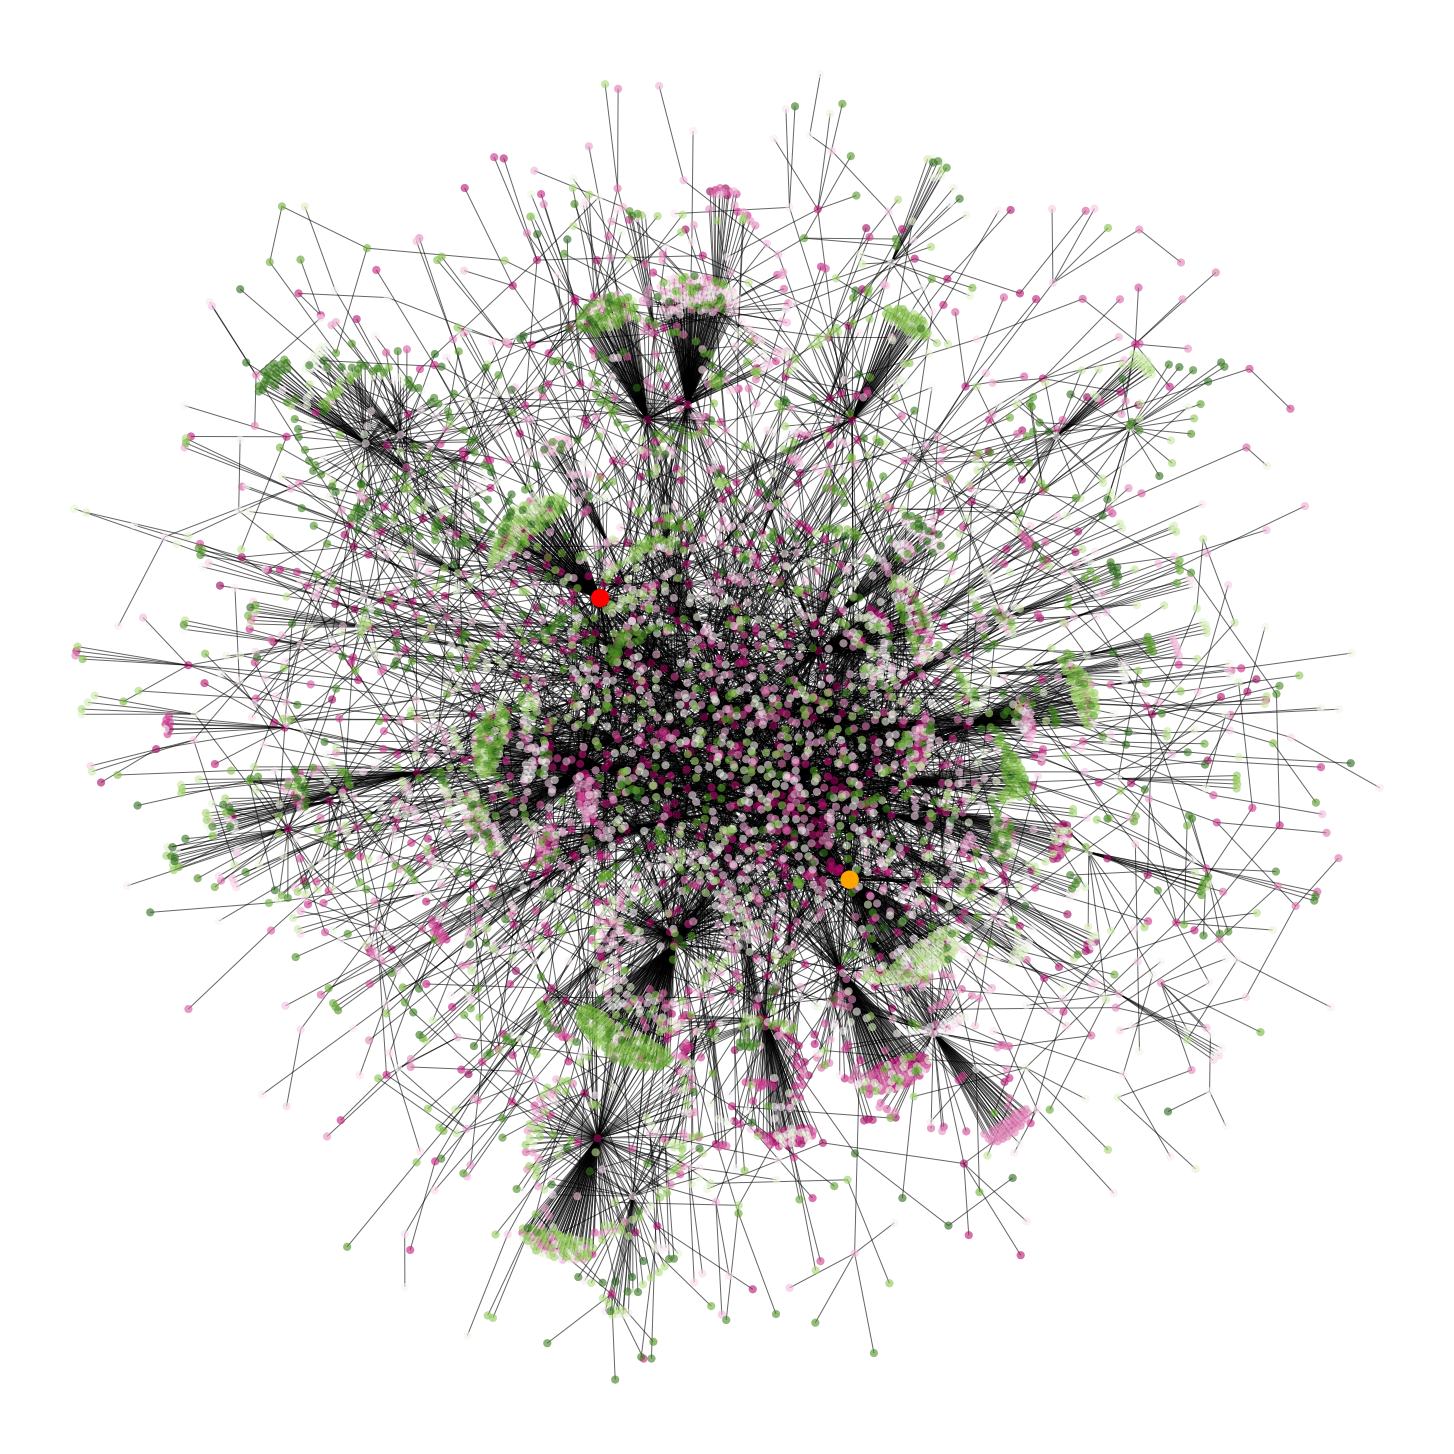

In [76]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(5803), 
        cmap=plt.cm.PiYG, 
        edge_color="black", 
        linewidths=0.3, 
        node_size=60, 
        alpha=0.6, 
        with_labels=False)

nx.draw_networkx_nodes(largest_subgraph, pos=pos, 
                       nodelist=central_nodes, node_size=300, 
                       node_color=colors_central_nodes)




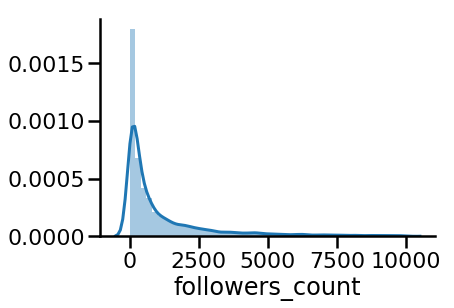

In [96]:
sns.set_context('poster')
sns.distplot((tweets_final[tweets_final.followers_count < 1e4].groupby('user_id').followers_count.max()))
sns.despine()

In [99]:
tweets_final[tweets_final.followers_count > 15e3].user_id.unique().size

313